In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
# Import the dataset and rename it health
health = pd.read_csv("healthcare_dataset.csv")
health.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

The healthcare_dataset has one discrete variable, two continuous variables and 12 categorical variables.


## Explain the central tendency and distribution of any two continuous variables

In [5]:
# Central tendency of age and room number
health.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


Text(0, 0.5, 'Count')

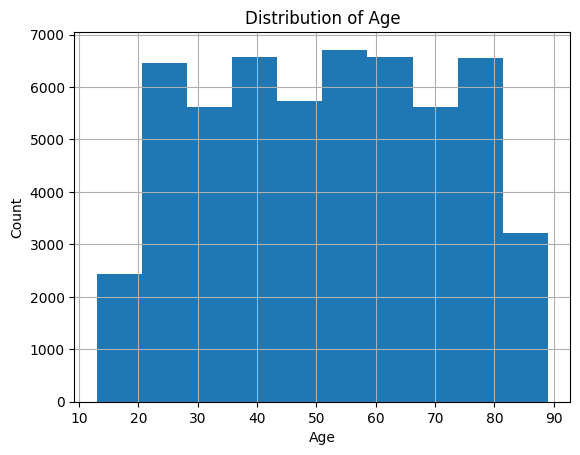

In [20]:
#The distribution of Age using a histogram
health['Age'].hist()
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")

Central tendency for Age:

mean = 51.53

median = 52

The mean is tending towards the median hence the variable Age is normally distributed.

Text(0, 0.5, 'Count')

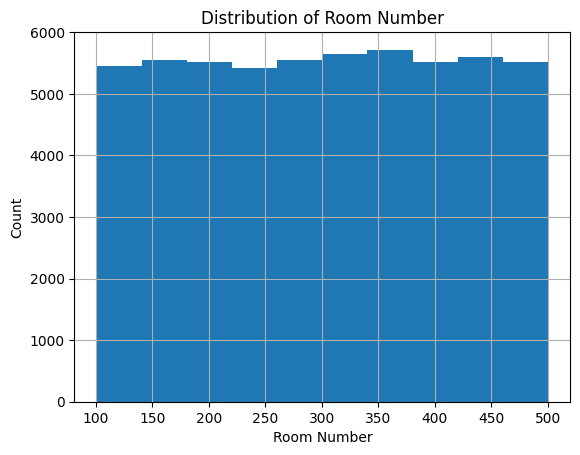

In [21]:
#The distribution of Room Number using a histogram
health['Room Number'].hist()
plt.title("Distribution of Room Number")
plt.xlabel("Room Number")
plt.ylabel("Count")

Central tendency for Room Number:

mean = 301.13

median = 302

The mean is tending towards the median hence the variable Room Number is normally distributed.

## Explain the marginal probability of any two categorical variables

In [23]:
#Marginal probability of Admission Type
Admission_probabilities = health['Admission Type'].value_counts()/len(health)
Admission_probabilities

Admission Type
Elective     0.336126
Urgent       0.334703
Emergency    0.329171
Name: count, dtype: float64

The probability that a person admitted has an elective admission type is higher (33.61%) than a person that has an urgent (33.47%) or emergency (32.92%) admission type.

In [25]:
# Marginal probability of Hospital
Results_probabilities = health['Test Results'].value_counts()/len(health)
Results_probabilities

Test Results
Abnormal        0.335622
Normal          0.333640
Inconclusive    0.330739
Name: count, dtype: float64

The probabilty that a person's test results come back as abnormal(33.56%) is higher than when they come back as normal(33.36%) or inconclusive(33.07%).

## Explain the relationship between the "Medical Condition" and "Admission Type"

Text(0.5, 1.0, 'Relationship between Medical Condition and Admission Type')

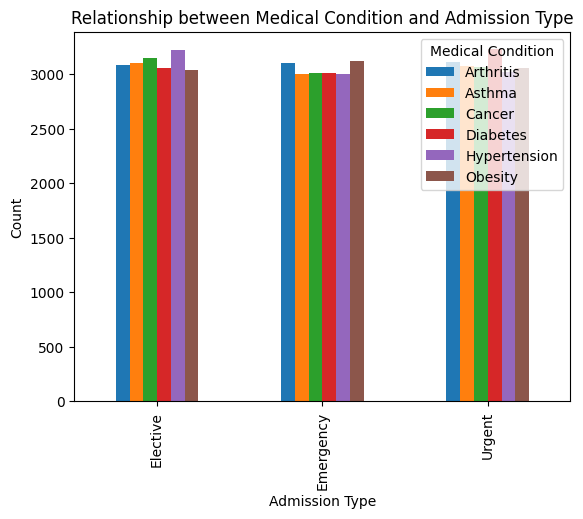

In [28]:
# Relationship using a barplot
condition_admission = pd.crosstab(index = health['Admission Type'], columns = health['Medical Condition'])
condition_admission.plot.bar()
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.title('Relationship between Medical Condition and Admission Type')

In [30]:
# Statistical relationship using a chi2test
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(condition_admission)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     19.338
p-value:            0.036172
degrees of freedom: 10


* According to the graph different medical conditions receive almost similar admission types depending on different factors.

* The p-value is less than 0.05 implying that there is a relationship between admission type and medical condition (The two variables are correlated)